<a href="https://colab.research.google.com/github/Chonthichar/CIFAR-10-Pytorch-Deep-learning/blob/main/MNIST_Pytorch_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implemented a Multi-Layer Perceptron (MLP) on the MNIST dataset for digit classification.**

##**Install Required Libaries :**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

##**Check if cuda device exists, use that. If not default to CPU :**

In [ ]:
# If cuda device exists, use that. If not default to CPU.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0




---


# **1. Prepare the Dataset :**

---



###  **▶ Define Transformations :**








 **Define Batch size**

In [ ]:
batch_size = 24;

**Define transformations**

In [ ]:
transform_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081))
])


### **▶ Load the dataset** - **Building Validation and Test Datasets :**

In [ ]:
# Load MNIST data set
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True,
                                           transform=transform_transform,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                         train=False,
                                         transform=transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16109921.16it/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 449163.10it/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1074367.30it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4328681.84it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



###  **▶ Create Data Loader :**

In [ ]:
# Create Data Loader
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### **▶ Data Exploration :**



*   Get the total Samples in the Training and Test Datasets :


---






In [ ]:
# Total number of samples in the trining dataset
total_train_samples = len(train_dataset)
print(f"Total number of samples in the training dataset: {total_train_samples}")

# Total number of samples in test dataset
total_test_samples = len(test_dataset)
print(f"Total number of samples in the test dataset: {total_test_samples}")

# Total number
total_samples = total_train_samples + total_test_samples
print(f"Total number of samples in the entires MINST dataset: {total_samples}")

Total number of samples in the training dataset: 60000
Total number of samples in the test dataset: 10000
Total number of samples in the entires MINST dataset: 70000


*  Print out how frequency each class appeas in the dataset by counting the lables :

---









In [ ]:
from collections import Counter

label_counts = Counter(train_dataset.targets.numpy())
for label, count in label_counts.items():
  print(f"Class {label}: {count} samples")

Class 5: 5421 samples
Class 0: 5923 samples
Class 4: 5842 samples
Class 1: 6742 samples
Class 9: 5949 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples




*   Plot the histogram :


---





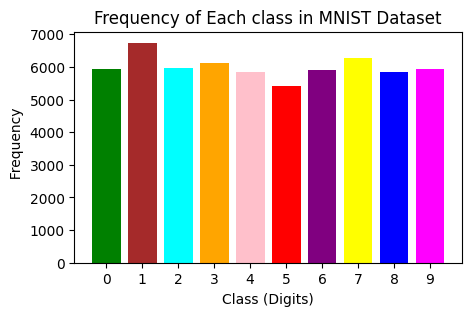

In [ ]:
# Plot the histogram
classes = list(label_counts.keys())
counts = list(label_counts.values())

# Define a list of color
colors = ['red', 'green', 'pink', 'brown', 'magenta', 'cyan', 'orange', 'purple', 'yellow', 'blue']


# Plotting the histogram
plt.figure(figsize=(5,3))
plt.bar(classes, counts, color=colors)

# Add titles and labels
plt.title("Frequency of Each class in MNIST Dataset")
plt.xlabel("Class (Digits)")
plt.ylabel("  Frequency")
plt.xticks(classes)

plt.show()



*   Get cpu, gpu or mps device for training :


---




In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"using device {device}")


using device cuda




*   Check the size of image batch, size of the label batch and prints the label of the first image in the batch :


---




Image Batch shape: torch.Size([24, 1, 28, 28])
Label Batch Shape: torch.Size([24])
Label : 5


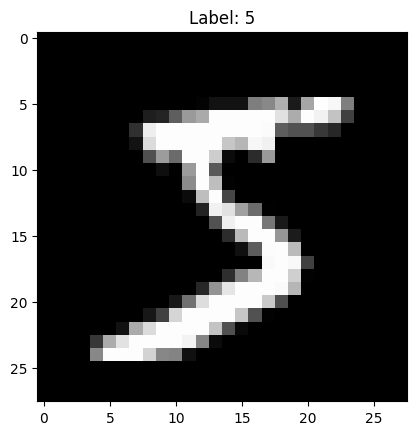

In [ ]:
images, labels = next(iter(train_loader))

print(f"Image Batch shape: {images.shape}")
print(f"Label Batch Shape: {labels.shape}")

# Print the first image's label
print(f"Label : {labels[0]}")

# Function to display an image from the dataset
def show_image(image, label):
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.show()

# Display the first image and its label
show_image(images[0], labels[0].item())



*   Display multiple images at once :



---



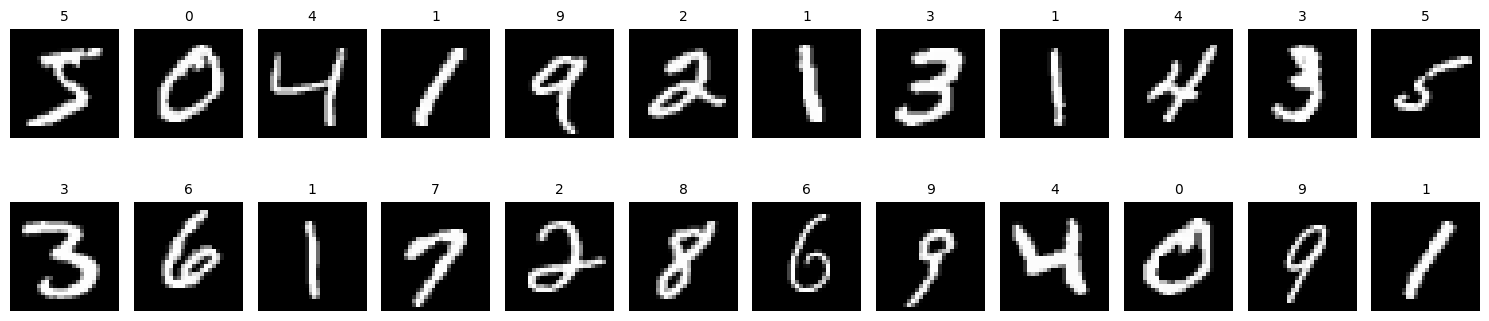

In [ ]:
def show_images(images, labels, n=24):
    n = min(n, len(images))
    rows = 2
    cols = n // 2
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4))

    for i in range(n):
        ax = axes[i // cols, i % cols]
        ax.imshow(images[i].squeeze(), cmap="gray")
        ax.set_title(f"{labels[i].item()}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images from the batch
show_images(images, labels, n=24)


### ▶ **Function to display a batch of images, true labels, and predicted labels** (placeholder before training):



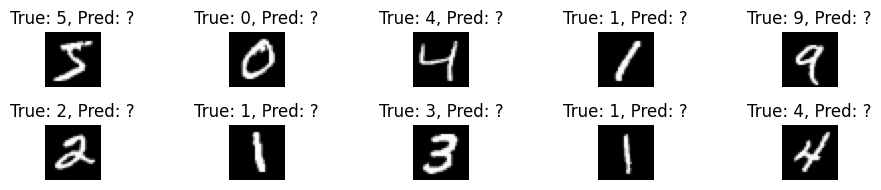

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_images_with_preds(dataloader, num_images=10, preds=None):
    # Get a batch of images and labels from the dataloader
    images, labels = next(iter(dataloader))

    # If preds is None, initialize an empty list
    if preds is None:
        preds = [None] * num_images

    # Plot the images and corresponding labels and predictions
    plt.figure(figsize=(10, 2))

    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        true_label = labels[i].item()
        pred_label = preds[i] if preds[i] is not None else "?"
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage before training (showing just true labels, no predictions yet)
visualize_images_with_preds(train_loader, num_images=10)  # Preds is set to None by default




---


##**2. Define the Model Architecture - MLP :**


---



In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self). __init__()
    hidden_1 = 512
    hidden_2 = 512

    self.fc1 = nn.Linear(28 * 28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2,10)

    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x

  # Initialize the MLP
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)




---

## ▶ **Combination**
##**3. Define the Loss Function, Optimizer and Learning rate scheduler :**
## **AND**
##**4. Model training  :**


---




In [ ]:
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20):
    # Lists to store the loss and accuracy for each epoch
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        # Set the model to training mode
        model.train()

        # Initialize running variables for loss and accuracy
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training Loop
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()  # Accumulate loss

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)  # Average training loss
        train_accuracy = 100 * correct_train / total_train  # Training accuracy


        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Adjust learning rate using the scheduler
        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            scheduler.step(test_loss)
        else:
            scheduler.step()

        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%\n")

    return train_losses, train_accuracies, test_losses, test_accuracies



---

##**5. Model evaluation :**


---



In [ ]:
# Function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate test accuracy
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    return test_loss, test_accuracy



---

# **6.  Making Prediction and Experiment:**

---



###**▶ Experiment to test `Three differnt optimizer technique `and` Three different learning rate schedulers` :**

        Experiment 1: SGD optimizer
            1. SGD with StepLR Scheduler
            2. SGD with ReduceLROnPlateau
            3. SGD with ExponentialLR Scheduler

        Experiment 2: Adam optimizer
            1. Adam with StepLR Scheduler
            2. Adam with ReduceLTROnPlateau scheduler_steplr
            3. Adam with ExponentialLR Scheduler

        Experiment 3: RMSprop optimizer
            1. RMSprop with StepLR Scheduler
            2. RMSprop with ReduceLTROnPlateau scheduler_steplr
            3. RMSprop with ExponentialLR Scheduler


##**Experiment 1: SGD optimizer  and  (3) learning rate schedulers**  


---



---



        1. SGD with StepLR Scheduler
        2. SGD with ReduceLROnPlateau
        3. SGD with ExponentialLR Scheduler








###**1. SGD with StepLR Scheduler**







In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1_StepLR = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_sgd = torch.optim.SGD(model_experiment1_StepLR.parameters(), lr=0.01)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with StepLR")

train_losses_experiment1_steplr, train_accuracies_experiment1_steplr, test_losses_experiment1_steplr, test_accuracies_experiment1_steplr = train_model(
    model_experiment1_StepLR, train_loader, test_loader, criterion, optimizer_sgd, scheduler_steplr, epochs=20
)

Running Experiment 1: SGD with StepLR
Epoch [1/20]
Train Loss: 0.4920, Train Accuracy: 86.70%
Test Loss: 0.8696, Test Accuracy: 90.61%

Epoch [2/20]
Train Loss: 0.2155, Train Accuracy: 93.59%
Test Loss: 0.8016, Test Accuracy: 93.80%

Epoch [3/20]
Train Loss: 0.1576, Train Accuracy: 95.29%
Test Loss: 0.7431, Test Accuracy: 95.25%

Epoch [4/20]
Train Loss: 0.1243, Train Accuracy: 96.32%
Test Loss: 0.6973, Test Accuracy: 95.90%

Epoch [5/20]
Train Loss: 0.1038, Train Accuracy: 96.99%
Test Loss: 0.6550, Test Accuracy: 96.33%

Epoch [6/20]
Train Loss: 0.0867, Train Accuracy: 97.48%
Test Loss: 0.6007, Test Accuracy: 96.74%

Epoch [7/20]
Train Loss: 0.0762, Train Accuracy: 97.72%
Test Loss: 0.5646, Test Accuracy: 96.82%

Epoch [8/20]
Train Loss: 0.0666, Train Accuracy: 98.00%
Test Loss: 0.5309, Test Accuracy: 96.99%

Epoch [9/20]
Train Loss: 0.0596, Train Accuracy: 98.28%
Test Loss: 0.4948, Test Accuracy: 97.28%

Epoch [10/20]
Train Loss: 0.0532, Train Accuracy: 98.46%
Test Loss: 0.4652, Test

###**Visulization Results :**


---



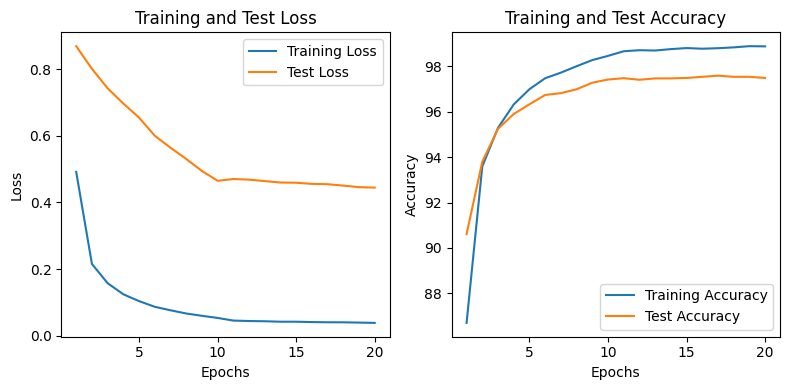

In [ ]:
# Plot the losses and accuracies
epochs = range(1, 21) #

plt.figure(figsize=(8, 4))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_steplr, label='Training Loss')
plt.plot(epochs, test_losses_experiment1_steplr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_steplr, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment1_steplr, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

#### **Function to get predictions from the model after training:**

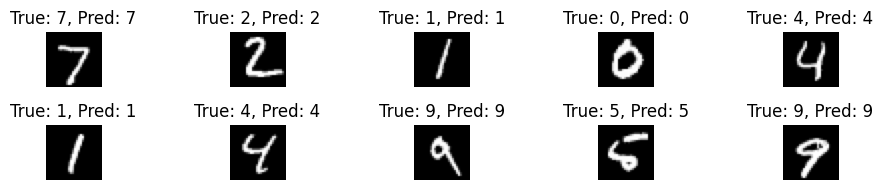

In [ ]:
# Function to get predictions from the model
def get_predictions(model, dataloader, num_images=10):
    model.eval()
    images, labels = next(iter(dataloader))

    # Move images to the same device as the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    images = images.to(device)
    model.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get the predicted labels

    return images.cpu(), labels, preds.cpu()

images, true_labels, pred_labels = get_predictions(model_experiment1_StepLR, test_loader, num_images=10)
visualize_images_with_preds(test_loader, num_images=10, preds=pred_labels)


###**2. SGD with ReduceLROnPlateau**







In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1_Reduce = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_sgd = torch.optim.SGD(model_experiment1_Reduce.parameters(), lr=0.01)
scheduler_plateau_experiment1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_sgd, mode='min', factor=0.1, patience=5)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with StepLR")

train_losses_experiment1_plateau, train_accuracies_experiment1_plateau, test_losses_experiment1_plateau, test_accuracies_experiment1_plateau = train_model(
    model_experiment1_Reduce, train_loader, test_loader, criterion, optimizer_sgd, scheduler_plateau_experiment1, epochs=20
)



Running Experiment 1: SGD with StepLR
Epoch [1/20]
Train Loss: 0.4835, Train Accuracy: 86.95%
Test Loss: 0.8563, Test Accuracy: 91.40%

Epoch [2/20]
Train Loss: 0.2101, Train Accuracy: 93.83%
Test Loss: 0.7982, Test Accuracy: 94.03%

Epoch [3/20]
Train Loss: 0.1526, Train Accuracy: 95.56%
Test Loss: 0.7520, Test Accuracy: 95.10%

Epoch [4/20]
Train Loss: 0.1221, Train Accuracy: 96.36%
Test Loss: 0.6953, Test Accuracy: 95.92%

Epoch [5/20]
Train Loss: 0.1024, Train Accuracy: 96.97%
Test Loss: 0.6430, Test Accuracy: 96.45%

Epoch [6/20]
Train Loss: 0.0872, Train Accuracy: 97.35%
Test Loss: 0.6073, Test Accuracy: 96.78%

Epoch [7/20]
Train Loss: 0.0758, Train Accuracy: 97.72%
Test Loss: 0.5641, Test Accuracy: 96.99%

Epoch [8/20]
Train Loss: 0.0668, Train Accuracy: 98.02%
Test Loss: 0.5321, Test Accuracy: 97.22%

Epoch [9/20]
Train Loss: 0.0586, Train Accuracy: 98.22%
Test Loss: 0.4933, Test Accuracy: 97.28%

Epoch [10/20]
Train Loss: 0.0535, Train Accuracy: 98.40%
Test Loss: 0.4787, Test

###**Visulization Results :**


---



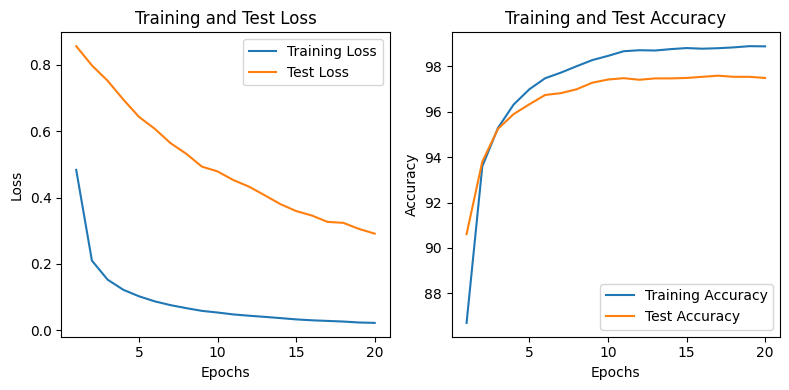

In [ ]:
# Plot the losses and accuracies
epochs = range(1, 21)

plt.figure(figsize=(8, 4))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_plateau, label='Training Loss')
plt.plot(epochs, test_losses_experiment1_plateau, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()


# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_steplr, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment1_steplr, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

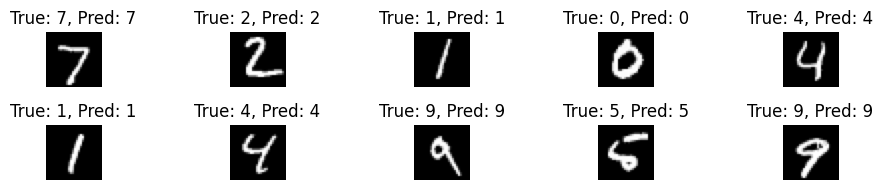

In [ ]:
# Function to get predictions from the model
def get_predictions(model, dataloader, num_images=10):
    model.eval()  # Set the model to evaluation mode
    images, labels = next(iter(dataloader))

    # Move images to the same device as the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    images = images.to(device)
    model.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    return images.cpu(), labels, preds.cpu()


images, true_labels, pred_labels = get_predictions(model_experiment1_Reduce, test_loader, num_images=10)
visualize_images_with_preds(test_loader, num_images=10, preds=pred_labels)


###**3. SGD with ExponentialLR Scheduler**

In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1_Exponential = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_sgd = torch.optim.SGD(model_experiment1_Exponential.parameters(), lr=0.01)
scheduler_explr_experiment1 = optim.lr_scheduler.ExponentialLR(optimizer_sgd, gamma=0.9)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with ExponentialLR Scheduler")

train_losses_experiment1_ExponentialLR, train_accuracies_experiment1_ExponentialLR, test_losses_experiment1_ExponentialLR, test_accuracies_experiment1_ExponentialLR = train_model(
    model_experiment1_Exponential, train_loader, test_loader, criterion, optimizer_sgd, scheduler_explr_experiment1, epochs=20
)

Running Experiment 1: SGD with ExponentialLR Scheduler
Epoch [1/20]
Train Loss: 0.4880, Train Accuracy: 86.42%
Test Loss: 0.8973, Test Accuracy: 90.48%

Epoch [2/20]
Train Loss: 0.2170, Train Accuracy: 93.65%
Test Loss: 0.8496, Test Accuracy: 93.17%

Epoch [3/20]
Train Loss: 0.1628, Train Accuracy: 95.17%
Test Loss: 0.7951, Test Accuracy: 94.56%

Epoch [4/20]
Train Loss: 0.1321, Train Accuracy: 96.06%
Test Loss: 0.7558, Test Accuracy: 95.38%

Epoch [5/20]
Train Loss: 0.1136, Train Accuracy: 96.62%
Test Loss: 0.7313, Test Accuracy: 95.81%

Epoch [6/20]
Train Loss: 0.1001, Train Accuracy: 96.96%
Test Loss: 0.7001, Test Accuracy: 96.14%

Epoch [7/20]
Train Loss: 0.0891, Train Accuracy: 97.35%
Test Loss: 0.6567, Test Accuracy: 96.36%

Epoch [8/20]
Train Loss: 0.0828, Train Accuracy: 97.57%
Test Loss: 0.6469, Test Accuracy: 96.40%

Epoch [9/20]
Train Loss: 0.0768, Train Accuracy: 97.72%
Test Loss: 0.6305, Test Accuracy: 96.71%

Epoch [10/20]
Train Loss: 0.0717, Train Accuracy: 97.89%
Test L

###**Visulization Results :**


---



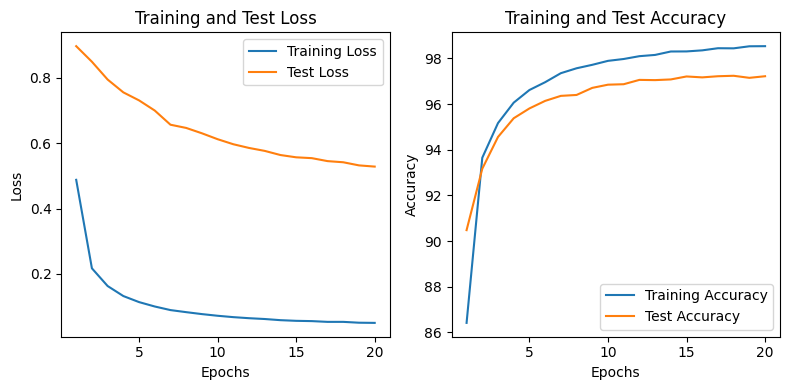

In [ ]:
# Plot the losses and accuracies
epochs = range(1, 21)

plt.figure(figsize=(8, 4))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_ExponentialLR, label='Training Loss')
plt.plot(epochs, test_losses_experiment1_ExponentialLR, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()


# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_ExponentialLR, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment1_ExponentialLR, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#**Experient 2 : Adam Optimizer and  (3) learning rate schedulers**


        1. Adam with StepLR Scheduler
        2. Adam with ReduceLTROnPlateau scheduler_steplr
        3. Adam with ExponentialLR Scheduler



###**1. Adam with StepLR Scheduler**


---




In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2_StepLR = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2_StepLR.parameters(), lr=0.01)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_adam, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 2: Adam with StepLR")

train_losses_experiment2_steplr, train_accuracies_experiment2_steplr, test_losses_experiment2_steplr, test_accuracies_experiment2_steplr = train_model(
    model_experiment2_StepLR, train_loader, test_loader, criterion, optimizer_adam, scheduler_steplr, epochs=20)


Running Experiment 2: Adam with StepLR
Epoch [1/20]
Train Loss: 0.8794, Train Accuracy: 76.73%
Test Loss: 0.7998, Test Accuracy: 82.11%

Epoch [2/20]
Train Loss: 0.7726, Train Accuracy: 78.34%
Test Loss: 1.4091, Test Accuracy: 73.02%

Epoch [3/20]
Train Loss: 0.7639, Train Accuracy: 78.88%
Test Loss: 10.9646, Test Accuracy: 65.10%

Epoch [4/20]
Train Loss: 0.7718, Train Accuracy: 79.32%
Test Loss: 4.0403, Test Accuracy: 68.83%

Epoch [5/20]
Train Loss: 0.6986, Train Accuracy: 80.86%
Test Loss: 3.4393, Test Accuracy: 73.25%

Epoch [6/20]
Train Loss: 0.6875, Train Accuracy: 81.32%
Test Loss: 3.5528, Test Accuracy: 70.10%

Epoch [7/20]
Train Loss: 0.6904, Train Accuracy: 81.16%
Test Loss: 4.2827, Test Accuracy: 63.15%

Epoch [8/20]
Train Loss: 0.6761, Train Accuracy: 81.50%
Test Loss: 3.6871, Test Accuracy: 67.35%

Epoch [9/20]
Train Loss: 0.6660, Train Accuracy: 81.55%
Test Loss: 2.8416, Test Accuracy: 72.52%

Epoch [10/20]
Train Loss: 0.6529, Train Accuracy: 81.99%
Test Loss: 5.3539, Te

###**Visulization Results :**


---



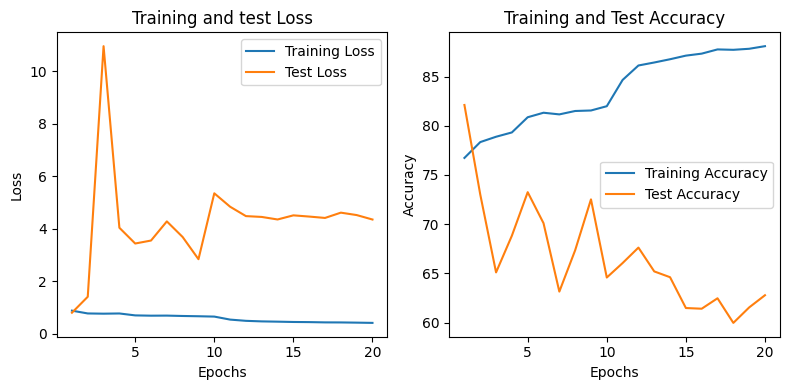

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(8,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment2_steplr, label='Training Loss')
plt.plot(epochs, test_losses_experiment2_steplr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_steplr, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment2_steplr, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###**2. Adam with ReduceLTROnPlateau scheduler_steplr**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2_Reduce = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2_Reduce.parameters(), lr=0.01)

# Now call the function to train and evaluate
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer_adam, mode='min', factor=0.1, patience=5)


print("Running Experiment 2: Adam with ReduceLROnPlateau")
train_losses_experiment2_plateau , train_accuracies_experiment2_plateau , test_losses_experiment2_plateau, test_accuracies_experiment2_plateau  = train_model(
    model_experiment2_Reduce, train_loader, test_loader, criterion, optimizer_adam, scheduler_plateau, epochs=20)


Running Experiment 2: Adam with ReduceLROnPlateau
Epoch [1/20]
Train Loss: 0.8619, Train Accuracy: 77.30%
Test Loss: 1.0040, Test Accuracy: 77.32%

Epoch [2/20]
Train Loss: 0.7170, Train Accuracy: 80.24%
Test Loss: 1.1214, Test Accuracy: 75.82%

Epoch [3/20]
Train Loss: 0.7057, Train Accuracy: 81.02%
Test Loss: 2.0524, Test Accuracy: 76.30%

Epoch [4/20]
Train Loss: 0.6847, Train Accuracy: 81.14%
Test Loss: 5.6260, Test Accuracy: 71.55%

Epoch [5/20]
Train Loss: 0.6844, Train Accuracy: 81.75%
Test Loss: 1.8256, Test Accuracy: 73.40%

Epoch [6/20]
Train Loss: 0.6492, Train Accuracy: 82.20%
Test Loss: 1.4420, Test Accuracy: 75.67%

Epoch [7/20]
Train Loss: 0.6418, Train Accuracy: 81.97%
Test Loss: 1.6698, Test Accuracy: 77.58%

Epoch [8/20]
Train Loss: 0.5164, Train Accuracy: 84.80%
Test Loss: 1.5119, Test Accuracy: 76.69%

Epoch [9/20]
Train Loss: 0.4494, Train Accuracy: 86.33%
Test Loss: 1.5657, Test Accuracy: 75.12%

Epoch [10/20]
Train Loss: 0.4203, Train Accuracy: 87.03%
Test Loss: 

###**Visulization Results :**


---


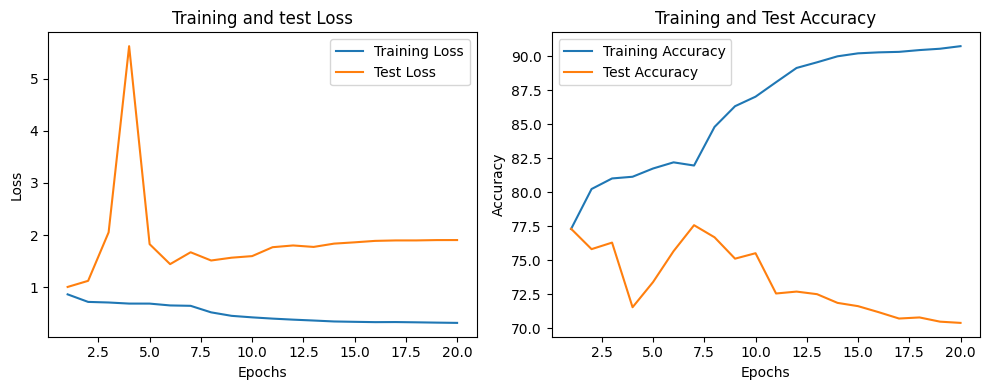

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(10,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment2_plateau , label='Training Loss')
plt.plot(epochs, test_losses_experiment2_plateau , label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()


# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_plateau , label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment2_plateau , label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###**3. Adam with ExponentialLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2_Exponential = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2_Exponential.parameters(), lr=0.01)
scheduler_explr = optim.lr_scheduler.ExponentialLR(optimizer_adam, gamma=0.9)

# Now call the function to train and evaluate
print("Running Experiment 2: Adam with ExponentialLR Scheduler")
train_losses_experiment2_explr, train_accuracies_experiment2_explr, test_losses_experiment2_explr, test_accuracies_experiment2_explr = train_model(
    model_experiment2_Exponential, train_loader, test_loader, criterion, optimizer_adam, scheduler_explr, epochs=20)


Running Experiment 2: Adam with ExponentialLR Scheduler
Epoch [1/20]
Train Loss: 0.9173, Train Accuracy: 76.56%
Test Loss: 1.5361, Test Accuracy: 67.11%

Epoch [2/20]
Train Loss: 0.7129, Train Accuracy: 80.53%
Test Loss: 1.7196, Test Accuracy: 73.80%

Epoch [3/20]
Train Loss: 0.6433, Train Accuracy: 83.01%
Test Loss: 1.0130, Test Accuracy: 80.08%

Epoch [4/20]
Train Loss: 0.6005, Train Accuracy: 84.26%
Test Loss: 2.1427, Test Accuracy: 76.91%

Epoch [5/20]
Train Loss: 0.5554, Train Accuracy: 85.58%
Test Loss: 1.5668, Test Accuracy: 76.56%

Epoch [6/20]
Train Loss: 0.4879, Train Accuracy: 86.95%
Test Loss: 1.7975, Test Accuracy: 77.34%

Epoch [7/20]
Train Loss: 0.4650, Train Accuracy: 87.50%
Test Loss: 2.0011, Test Accuracy: 74.02%

Epoch [8/20]
Train Loss: 0.4460, Train Accuracy: 88.03%
Test Loss: 1.8711, Test Accuracy: 62.84%

Epoch [9/20]
Train Loss: 0.4350, Train Accuracy: 88.23%
Test Loss: 2.7466, Test Accuracy: 66.46%

Epoch [10/20]
Train Loss: 0.4132, Train Accuracy: 88.85%
Test 

###**Visulization Results :**


---

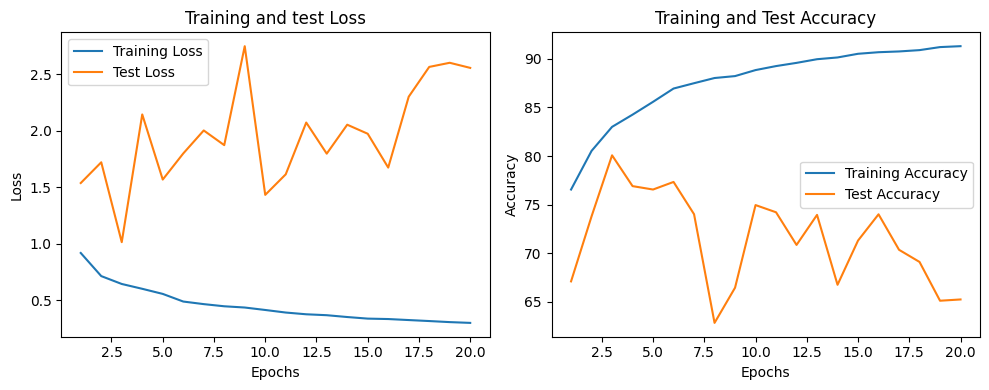

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(10,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment2_explr, label='Training Loss')
plt.plot(epochs, test_losses_experiment2_explr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_explr, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment2_explr, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##**Experiment 3 : RMSprop and  (3) learning rate schedulers**

---



---
        1. RMSprop with StepLR Scheduler
        2. RMSprop with ReduceLTROnPlateau scheduler_steplr
        3. RMSprop with ExponentialLR Scheduler

###**1. RMSprop with StepLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3_StepLR = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3_StepLR.parameters(), lr=0.001)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_rmsprop, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 3: RMSprop with StepLR")
train_losses_experiment3_steplr, train_accuracies_experiment3_steplr, test_losses_experiment3_steplr, test_accuracies_experiment3_steplr = train_model(
    model_experiment3_StepLR, train_loader, test_loader, criterion, optimizer_rmsprop, scheduler_steplr, epochs=20
)

Running Experiment 3: RMSprop with StepLR
Epoch [1/20]
Train Loss: 0.2337, Train Accuracy: 93.21%
Test Loss: 0.2591, Test Accuracy: 94.46%

Epoch [2/20]
Train Loss: 0.1417, Train Accuracy: 96.12%
Test Loss: 0.2630, Test Accuracy: 91.97%

Epoch [3/20]
Train Loss: 0.1234, Train Accuracy: 96.67%
Test Loss: 0.2400, Test Accuracy: 94.35%

Epoch [4/20]
Train Loss: 0.1218, Train Accuracy: 96.95%
Test Loss: 0.2405, Test Accuracy: 95.42%

Epoch [5/20]
Train Loss: 0.1107, Train Accuracy: 97.19%
Test Loss: 0.4180, Test Accuracy: 94.03%

Epoch [6/20]
Train Loss: 0.1128, Train Accuracy: 97.34%
Test Loss: 0.5450, Test Accuracy: 94.13%

Epoch [7/20]
Train Loss: 0.1072, Train Accuracy: 97.51%
Test Loss: 0.7457, Test Accuracy: 93.75%

Epoch [8/20]
Train Loss: 0.1120, Train Accuracy: 97.44%
Test Loss: 1.0490, Test Accuracy: 92.96%

Epoch [9/20]
Train Loss: 0.1082, Train Accuracy: 97.63%
Test Loss: 1.3792, Test Accuracy: 92.01%

Epoch [10/20]
Train Loss: 0.1014, Train Accuracy: 97.66%
Test Loss: 1.7278, 

###**Visulization Results :**


---


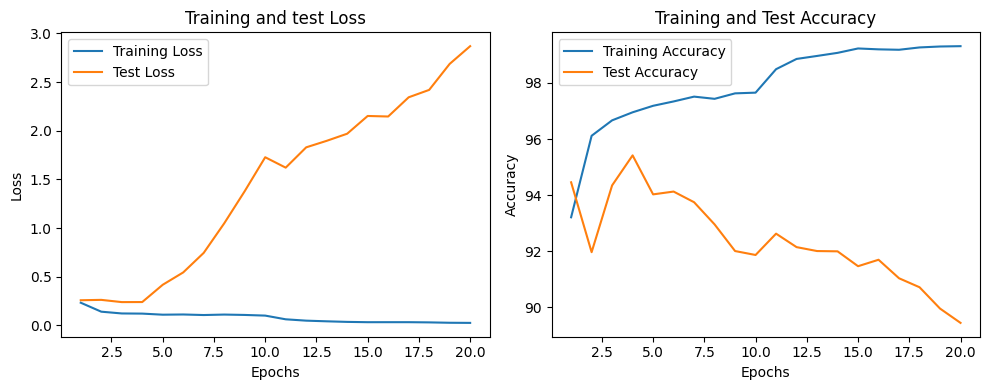

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(10,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment3_steplr, label='Training Loss')
plt.plot(epochs, test_losses_experiment3_steplr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3_steplr, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment3_steplr, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###**2. RMSprop with ReduceLTROnPlateau scheduler_steplr**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3_Reduce = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3_Reduce.parameters(), lr=0.001)
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer_rmsprop, mode='min', factor=0.1, patience=5)


print("Running Experiment 3: RMDprop with ReduceLROnPlateau")

train_losses_experiment3_plateau, train_accuracies_experiment3_plateau, test_losses_experiment3_plateau, test_accuracies_experiment3_plateau = train_model(
    model_experiment3_Reduce, train_loader, test_loader, criterion, optimizer_rmsprop, scheduler_plateau, epochs=20
)

Running Experiment 3: RMDprop with ReduceLROnPlateau
Epoch [1/20]
Train Loss: 0.2387, Train Accuracy: 93.04%
Test Loss: 0.3017, Test Accuracy: 93.08%

Epoch [2/20]
Train Loss: 0.1424, Train Accuracy: 95.99%
Test Loss: 0.1905, Test Accuracy: 94.25%

Epoch [3/20]
Train Loss: 0.1281, Train Accuracy: 96.62%
Test Loss: 0.1834, Test Accuracy: 95.28%

Epoch [4/20]
Train Loss: 0.1208, Train Accuracy: 96.92%
Test Loss: 0.3077, Test Accuracy: 94.67%

Epoch [5/20]
Train Loss: 0.1169, Train Accuracy: 97.16%
Test Loss: 0.3928, Test Accuracy: 94.94%

Epoch [6/20]
Train Loss: 0.1121, Train Accuracy: 97.21%
Test Loss: 0.4190, Test Accuracy: 95.50%

Epoch [7/20]
Train Loss: 0.1054, Train Accuracy: 97.47%
Test Loss: 0.5836, Test Accuracy: 95.46%

Epoch [8/20]
Train Loss: 0.1051, Train Accuracy: 97.56%
Test Loss: 0.9117, Test Accuracy: 93.77%

Epoch [9/20]
Train Loss: 0.0991, Train Accuracy: 97.68%
Test Loss: 1.5651, Test Accuracy: 91.32%

Epoch [10/20]
Train Loss: 0.0671, Train Accuracy: 98.43%
Test Los

###**Visulization Results :**


---


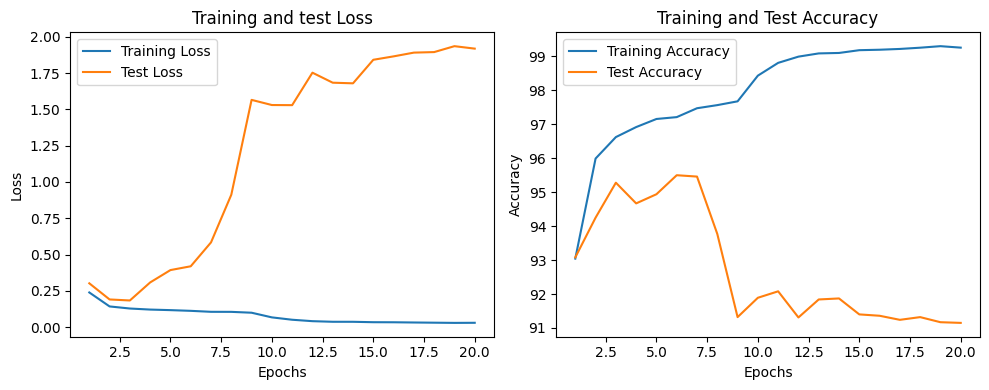

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(10,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment3_plateau, label='Training Loss')
plt.plot(epochs, test_losses_experiment3_plateau, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3_plateau, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment3_plateau, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###**3. RMSprop with ExponentialLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3_Exponential = MLP()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3_Exponential.parameters(), lr=0.001)
scheduler_explr = optim.lr_scheduler.ExponentialLR(optimizer_rmsprop, gamma=0.9)

# Now call the function to train and evaluate
print("Running Experient 3: RMSprop with ExponentialLR")

train_losses_experiment3, train_accuracies_experiment3, test_losses_experiment3, test_accuracies_experiment3 = train_model(
    model_experiment3_Exponential, train_loader, test_loader, criterion, optimizer_rmsprop, scheduler_explr, epochs=20
)

Running Experient 3: RMSprop with ExponentialLR
Epoch [1/20]
Train Loss: 0.2347, Train Accuracy: 93.14%
Test Loss: 0.2584, Test Accuracy: 92.84%

Epoch [2/20]
Train Loss: 0.1354, Train Accuracy: 96.27%
Test Loss: 0.1923, Test Accuracy: 94.12%

Epoch [3/20]
Train Loss: 0.1125, Train Accuracy: 96.98%
Test Loss: 0.2229, Test Accuracy: 94.64%

Epoch [4/20]
Train Loss: 0.0967, Train Accuracy: 97.44%
Test Loss: 0.3378, Test Accuracy: 93.81%

Epoch [5/20]
Train Loss: 0.0837, Train Accuracy: 97.72%
Test Loss: 0.4758, Test Accuracy: 93.49%

Epoch [6/20]
Train Loss: 0.0714, Train Accuracy: 98.16%
Test Loss: 0.6710, Test Accuracy: 92.10%

Epoch [7/20]
Train Loss: 0.0643, Train Accuracy: 98.28%
Test Loss: 0.6341, Test Accuracy: 93.88%

Epoch [8/20]
Train Loss: 0.0582, Train Accuracy: 98.50%
Test Loss: 0.7126, Test Accuracy: 93.97%

Epoch [9/20]
Train Loss: 0.0489, Train Accuracy: 98.70%
Test Loss: 0.8118, Test Accuracy: 94.16%

Epoch [10/20]
Train Loss: 0.0432, Train Accuracy: 98.87%
Test Loss: 0.

###**Visulization Results :**


---


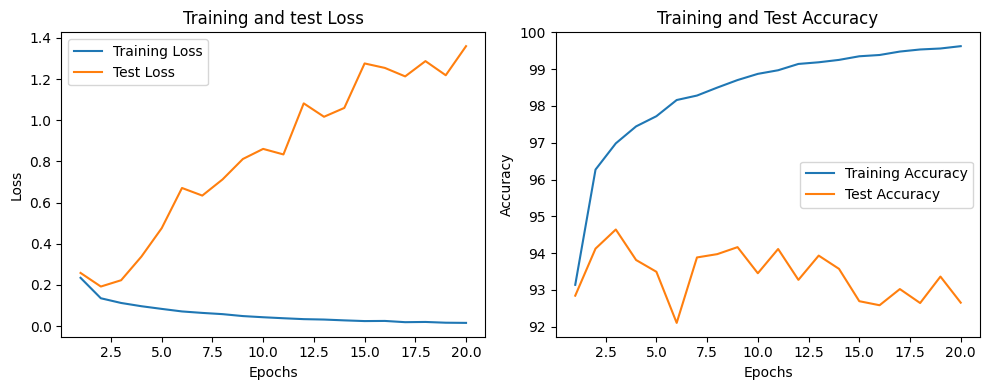

In [ ]:
# Plot the losses and accuracies
epochs = range(1,21)

plt.figure(figsize=(10,4))

# Plotting training and testing loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_experiment3, label='Training Loss')
plt.plot(epochs, test_losses_experiment3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3, label='Training Accuracy')
plt.plot(epochs, test_accuracies_experiment3, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##▶ **Comaparion the results :**


---




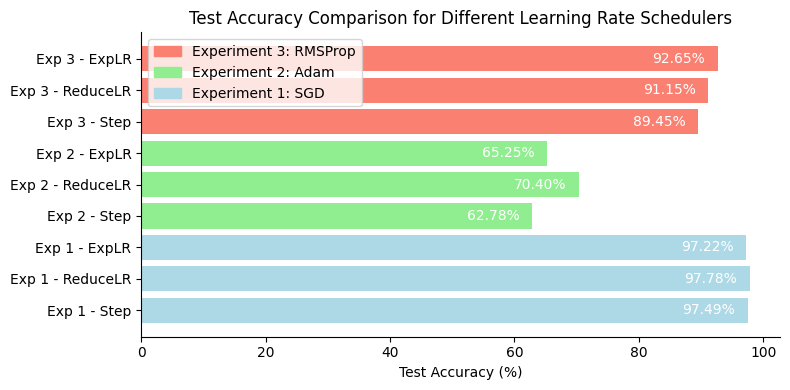

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for train accuracy in each experiment
experiments = ['StepLR', 'ReduceLROnPlateau', 'ExponentialLR']
exp1_test_accuracies = [97.49, 97.78, 97.22]  # Experiment 1 train accuracies
exp2_test_accuracies = [62.78, 70.40, 65.25]  # Experiment 2 train accuracies
exp3_test_accuracies = [89.45, 91.15, 92.65]  # Experiment 3 train accuracies

data = [
    ("Exp 1 - Step", exp1_test_accuracies[0]),
    ("Exp 1 - ReduceLR", exp1_test_accuracies[1]),
    ("Exp 1 - ExpLR", exp1_test_accuracies[2]),
    ("Exp 2 - Step", exp2_test_accuracies[0]),
    ("Exp 2 - ReduceLR", exp2_test_accuracies[1]),
    ("Exp 2 - ExpLR", exp2_test_accuracies[2]),
    ("Exp 3 - Step", exp3_test_accuracies[0]),
    ("Exp 3 - ReduceLR", exp3_test_accuracies[1]),
    ("Exp 3 - ExpLR", exp3_test_accuracies[2])
]

labels, train_accuracy_values = zip(*data)

colors = ['lightblue'] * 3 + ['lightgreen'] * 3 + ['salmon'] * 3

plt.figure(figsize=(8, 4))
bars = plt.barh(labels, train_accuracy_values, color=colors)

plt.xlabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison for Different Learning Rate Schedulers')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    width = bar.get_width()
    plt.text(width - 2,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}%',
             va='center',
             ha='right',
             color='white')

legend_labels = [ 'Experiment 3: RMSProp', 'Experiment 2: Adam','Experiment 1: SGD']
colors_legend = ['salmon','lightgreen',  'lightblue']
patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_legend]
plt.legend(patches, legend_labels, loc='upper left')

plt.tight_layout()
plt.show()


##▶ **Save the model**

---




In [ ]:
torch.save(model_experiment1_StepLR.state_dict(), "model_experiment1_StepLR.pth")
torch.save(model_experiment1_Reduce.state_dict(), "model_experiment1_Reduce.pth")
torch.save(model_experiment1_Exponential.state_dict(), "model_experiment1_Exponential.pth")
torch.save(model_experiment2_StepLR.state_dict(), "model_experiment2_StepLR.pth")
torch.save(model_experiment2_Reduce.state_dict(), "model_experiment2_Reduce.pth")
torch.save(model_experiment2_Exponential.state_dict(), "model_experiment2_Exponential.pth")
torch.save(model_experiment3_StepLR.state_dict(), "model_experiment3_StepLR.pth")
torch.save(model_experiment3_Reduce.state_dict(), "model_experiment3_Reduce.pth")
torch.save(model_experiment3_Exponential.state_dict(), "model_experiment3_Exponential.pth")

print("Save pytorch Model State to model_experiment1_StepLR.pth")
print("Save pytorch Model State to model_experiment1_Reduce.pth")
print("Save pytorch Model State to model_experiment1_Exponential.pth")
print("Save pytorch Model State to model_experiment2_StepLR.pth")
print("Save pytorch Model State to model_experiment2_Reduce.pth")
print("Save pytorch Model State to model_experiment2_Exponential.pth")
print("Save pytorch Model State to model_experiment3_StepLR.pth")
print("Save pytorch Model State to model_experiment3_Reduce.pth")
print("Save pytorch Model State to model_experiment3_Exponential.pth")

Save pytorch Model State to model_experiment1_StepLR.pth
Save pytorch Model State to model_experiment1_Reduce.pth
Save pytorch Model State to model_experiment1_Exponential.pth
Save pytorch Model State to model_experiment2_StepLR.pth
Save pytorch Model State to model_experiment2_Reduce.pth
Save pytorch Model State to model_experiment2_Exponential.pth
Save pytorch Model State to model_experiment3_StepLR.pth
Save pytorch Model State to model_experiment3_Reduce.pth
Save pytorch Model State to model_experiment3_Exponential.pth


## ▶ **Select the model to test prediction's accuracy :**
*   Model experiment1 SGD with StepLR



---



Accuracy for 10 images: 100.00%


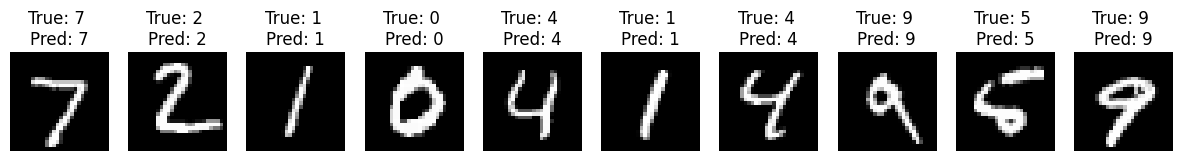

In [ ]:
# Function to get predictions and calculate accuracy
def get_predictions(model, dataloader, num_images=10):
    model.eval()
    images, labels = next(iter(dataloader))

    # Move images to the same device as the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    images = images.to(device)
    model.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    # Calculate accuracy
    correct_preds = (preds == labels.to(device)).sum().item()
    accuracy = (correct_preds / len(labels)) * 100
    print(f'Accuracy for {num_images} images: {accuracy:.2f}%')

    return images.cpu(), labels, preds.cpu()

# Load the trained model from the .pth file
images, true_labels, pred_labels = get_predictions(model_experiment1_StepLR, test_loader, num_images=10)

def visualize_images_with_preds(images, true_labels, preds, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0).squeeze(), cmap='gray')
        ax.set_title(f'True: {true_labels[i]} \nPred: {preds[i]}')
        ax.axis('off')
    plt.show()

# Visualize the predictions
visualize_images_with_preds(images, true_labels, pred_labels)


## ▶ **Final Graphs Showing the Comparison**

---



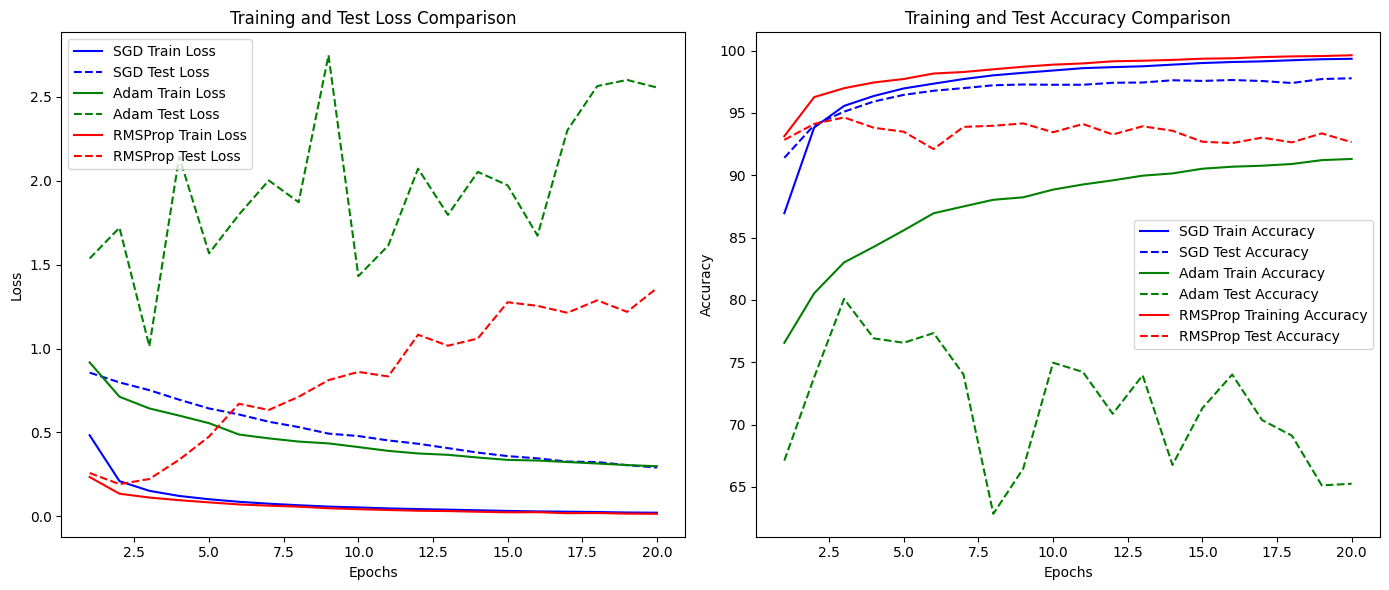

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 21))

# Plotting Loss for all optimizers
plt.figure(figsize=(14, 6))

# Subplot 1 - Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_plateau, label='SGD Train Loss', color='blue')
plt.plot(epochs, test_losses_experiment1_plateau, label='SGD Test Loss', color='blue', linestyle='dashed')
plt.plot(epochs, train_losses_experiment2_explr, label='Adam Train Loss', color='green')
plt.plot(epochs, test_losses_experiment2_explr, label='Adam Test Loss', color='green', linestyle='dashed')
plt.plot(epochs, train_losses_experiment3, label='RMSProp Train Loss', color='red')
plt.plot(epochs, test_losses_experiment3, label='RMSProp Test Loss', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Comparison')
plt.legend()

# Subplot 2 - Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_plateau, label='SGD Train Accuracy', color='blue')
plt.plot(epochs, test_accuracies_experiment1_plateau, label='SGD Test Accuracy', color='blue', linestyle='dashed')
plt.plot(epochs, train_accuracies_experiment2_explr, label='Adam Train Accuracy', color='green')
plt.plot(epochs, test_accuracies_experiment2_explr, label='Adam Test Accuracy', color='green', linestyle='dashed')
plt.plot(epochs, train_accuracies_experiment3, label='RMSProp Training Accuracy', color='red')
plt.plot(epochs, test_accuracies_experiment3, label='RMSProp Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## ▶ **Experiment to test three different data augmentation techniques**  





To identify how large impact augmentation techniques can potentially improve the performance. The model sucs as **"Experiemnt 2: Adam with StepLR scheduler"** that perform moderately result between 88-91% with poor genralization and high overlifting  were selected. The following tecniques were used:


*   Rotation
*   Flipping horizontally
*   Cropped

---





###**◾ Data Augmentation Technique 1 :**


*   Random Flipping horizontally

---






Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:10<00:00, 988263.23it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 159304.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1507235.85it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 5942148.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/20], Train Loss: 0.8831, Train Accuracy: 72.06%, Test Loss: 0.3718, Test Accuracy: 89.38%
Epoch [2/20], Train Loss: 0.6728, Train Accuracy: 78.59%, Test Loss: 0.3653, Test Accuracy: 89.40%
Epoch [3/20], Train Loss: 0.6222, Train Accuracy: 80.36%, Test Loss: 0.3489, Test Accuracy: 89.69%
Epoch [4/20], Train Loss: 0.5873, Train Accuracy: 81.33%, Test Loss: 0.3454, Test Accuracy: 89.93%
Epoch [5/20], Train Loss: 0.5612, Train Accuracy: 82.11%, Test Loss: 0.3283, Test Accuracy: 90.47%
Epoch [6/20], Train Loss: 0.5431, Train Accuracy: 82.88%, Test Loss: 0.3300, Test Accuracy: 90.12%
Epoch [7/20], Train Loss: 0.5269, Train Accuracy: 83.40%, Test Loss: 0.3334, Test Accuracy: 90.15%
Epoch [8/20], Train Loss: 0.5152, Train Accuracy: 83.84%, Test Loss: 0.3183, Test Accuracy: 90.65%
Epoch [9/20], Train Loss: 0.4988, Train Accuracy: 84.28%, Test Loss: 0.3165, Test Accuracy: 90.67%
Epoch [10/20], Train Loss: 0.4922,

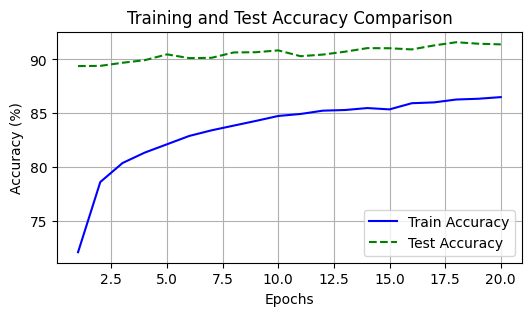

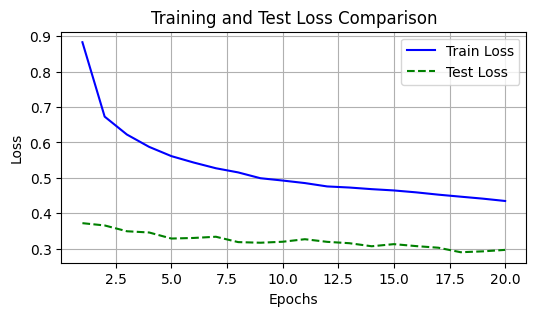

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        hidden_1 = 512
        hidden_2 = 512

        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)

        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define data augmentation techniques
transform_train = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)

model = MLP()
model.load_state_dict(torch.load('/content/model_experiment2_StepLR.pth', weights_only=True))  # Load the state dict
model.train()

criterion = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.001)

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    return test_loss, test_accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer_adam.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate on test set
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    # Print epoch stats
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Save the updated model
torch.save(model.state_dict(), "/content/model_experiment2_StepLR_updated_technique2.pth")
print("Model saved as model_experiment2_StepLR_updated_technique2.pth")

# Plotting Accuracy
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Comparison')
plt.legend()
plt.grid()
plt.show()

# plot the losses as well
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Comparison')
plt.legend()
plt.grid()
plt.show()


### **◾Data Augmentation Technique 2:**


*   Random Cropped

---





Epoch [1/20], Train Loss: 0.8302, Train Accuracy: 75.90%, Test Loss: 0.3358, Test Accuracy: 90.71%
Epoch [2/20], Train Loss: 0.7009, Train Accuracy: 79.34%, Test Loss: 0.3190, Test Accuracy: 91.16%
Epoch [3/20], Train Loss: 0.6639, Train Accuracy: 80.36%, Test Loss: 0.3036, Test Accuracy: 91.32%
Epoch [4/20], Train Loss: 0.6323, Train Accuracy: 81.19%, Test Loss: 0.3019, Test Accuracy: 91.57%
Epoch [5/20], Train Loss: 0.6107, Train Accuracy: 81.92%, Test Loss: 0.2901, Test Accuracy: 91.95%
Epoch [6/20], Train Loss: 0.5967, Train Accuracy: 82.36%, Test Loss: 0.2831, Test Accuracy: 92.39%
Epoch [7/20], Train Loss: 0.5902, Train Accuracy: 82.49%, Test Loss: 0.2941, Test Accuracy: 91.94%
Epoch [8/20], Train Loss: 0.5719, Train Accuracy: 82.92%, Test Loss: 0.2827, Test Accuracy: 92.28%
Epoch [9/20], Train Loss: 0.5538, Train Accuracy: 83.33%, Test Loss: 0.2734, Test Accuracy: 92.34%
Epoch [10/20], Train Loss: 0.5528, Train Accuracy: 83.42%, Test Loss: 0.2703, Test Accuracy: 92.47%
Epoch [11

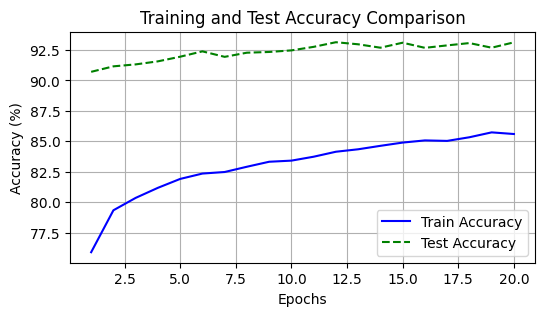

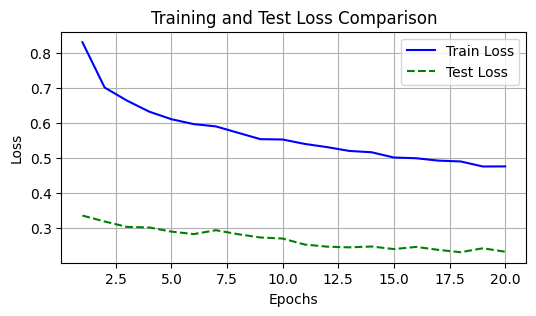

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        hidden_1 = 512
        hidden_2 = 512

        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)

        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define data augmentation techniques
transform_train = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),  # Data Augmentation Technique
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)

model = MLP()
model.load_state_dict(torch.load('/content/model_experiment2_StepLR.pth', weights_only=True))
model.train()

criterion = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.001)

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# Define a function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()


            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    return test_loss, test_accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer_adam.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Evaluate on test set
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    # Print epoch stats
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Save the updated model
torch.save(model.state_dict(), "/content/model_experiment2_StepLR_updated_technique2.pth")
print("Model saved as model_experiment2_StepLR_updated_technique2.pth")

# Plotting Accuracy
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Comparison')
plt.legend()
plt.grid()
plt.show()

# Optionally, plot the losses as well
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Comparison')
plt.legend()
plt.grid()
plt.show()



### **◾Data Augmentation Technique 3:**


*   Random Rotation

---





Epoch [1/20], Train Loss: 0.4603, Train Accuracy: 86.65%, Test Loss: 0.2639, Test Accuracy: 92.60%
Epoch [2/20], Train Loss: 0.4142, Train Accuracy: 88.05%, Test Loss: 0.2500, Test Accuracy: 92.72%
Epoch [3/20], Train Loss: 0.3938, Train Accuracy: 88.50%, Test Loss: 0.2460, Test Accuracy: 92.75%
Epoch [4/20], Train Loss: 0.3872, Train Accuracy: 88.61%, Test Loss: 0.2445, Test Accuracy: 92.92%
Epoch [5/20], Train Loss: 0.3861, Train Accuracy: 88.76%, Test Loss: 0.2311, Test Accuracy: 93.01%
Epoch [6/20], Train Loss: 0.3768, Train Accuracy: 89.00%, Test Loss: 0.2447, Test Accuracy: 92.57%
Epoch [7/20], Train Loss: 0.3674, Train Accuracy: 89.09%, Test Loss: 0.2280, Test Accuracy: 93.22%
Epoch [8/20], Train Loss: 0.3659, Train Accuracy: 89.20%, Test Loss: 0.2351, Test Accuracy: 92.92%
Epoch [9/20], Train Loss: 0.3595, Train Accuracy: 89.34%, Test Loss: 0.2257, Test Accuracy: 93.29%
Epoch [10/20], Train Loss: 0.3619, Train Accuracy: 89.21%, Test Loss: 0.2256, Test Accuracy: 93.49%
Epoch [11

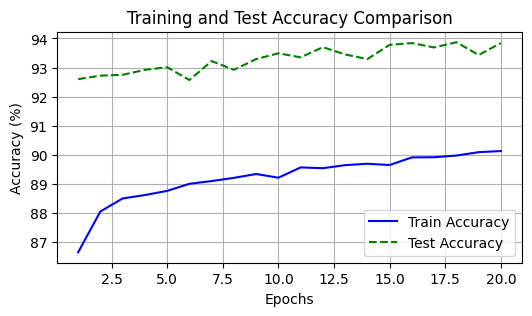

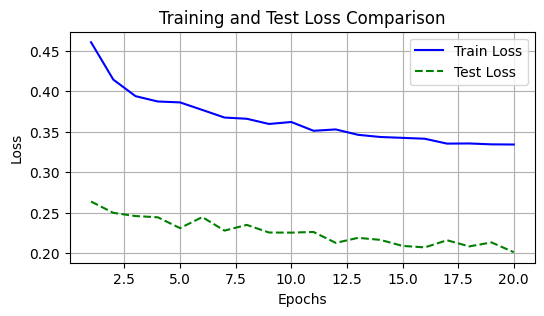

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        hidden_1 = 512
        hidden_2 = 512

        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)

        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define data augmentation techniques
transform_train = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomRotation(15),  # Data Augmentation Technique
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)

model = MLP()
model.load_state_dict(torch.load('/content/model_experiment2_StepLR.pth', weights_only=True))
model.train()

criterion = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.001)

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    return test_loss, test_accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer_adam.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    # Print epoch stats
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

torch.save(model.state_dict(), "/content/model_experiment2_StepLR_updated_technique2.pth")
print("Model saved as model_experiment2_StepLR_updated_technique2.pth")

# Plotting Accuracy
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Comparison')
plt.legend()
plt.grid()
plt.show()

# plot the losses as well
plt.figure(figsize=(6, 3))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Comparison')
plt.legend()
plt.grid()
plt.show()

